# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [47]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [48]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,85,105]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   7057   9810     9568    1762              3293          1776
1  16117  46197    92780    1026             40827          2944
2  15587   1014     3970     910               139          1378

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** Sample 0 represents a customer who relies (relatively) more on frozen food than fresh food. I know this because the average (mean) amount of frozen bought by the the three different samples is $1232.67, but the amount sample 0 spends on frozen food is much higher than that. So the establishment seems to be a cafe/resturant or such establishment that needs to buy a lot of frozen food to serve its customers on demand. 

Sample 1 buys the most amount of fresh food, and the most amount on milk, grocery, detergent_paper, implying that it is food/market or supermarket of some sort. Its total spending is $199891, compared to sample 0's 33266 and sample 1's 22998. This evidence confirms that sample 1 is establishment with considerable size (so a retailer rather than a service provider). 

Sample 2 buys a high proportion of fresh goods (fresh goods account for 68% of its purchases), and the lowest amount of frozen food (less than the mean ammount bought by all the customers), and the least amount of detergents_paper and delicatessen, implying that the customers in sample 2 tend to be businesses like resturants that serve food prepared from fresh ingredients.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

feature = 'Milk'
y = data[feature]
new_data = data.drop([feature], axis= 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("score is {} for {}".format(score,feature))

score is 0.365725292736 for Milk


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I tried to predict the feature milk. The reported R^2 score was 0.365725292736. As the score is low, we know that the model has high variability. This seems to suggest that the values for the feature 'Milk' is not well predicted by the other features which means that there would be a loss of information if the feature 'Milk' if ommited, so it is relevant for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

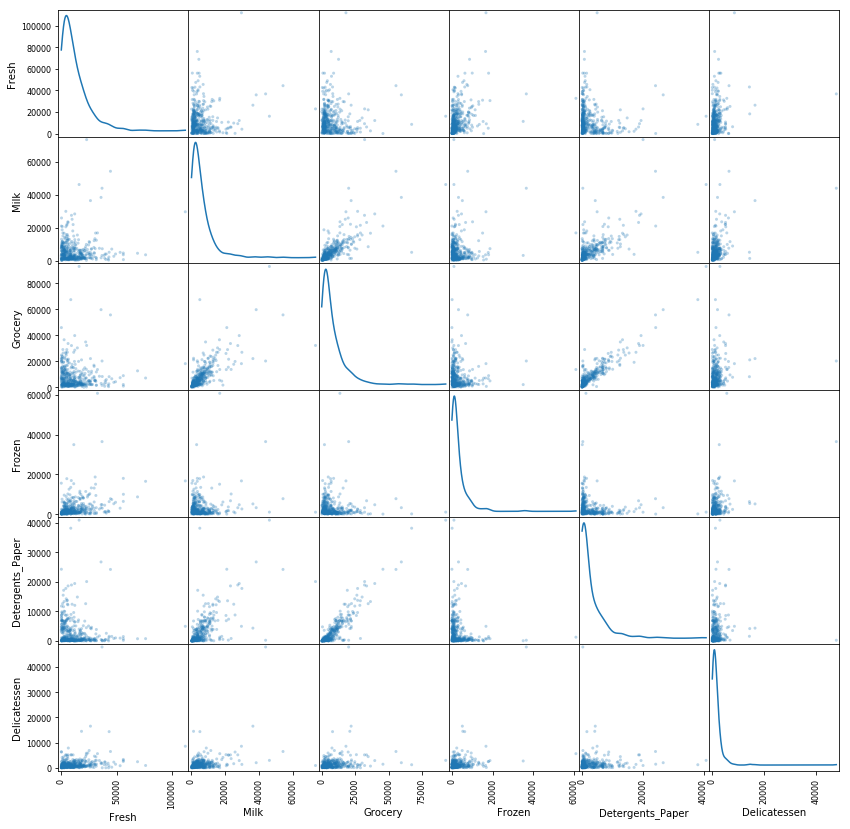

In [50]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,14), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** There seems a to be a strong positive correlation between grocery and detergents_paper (giving a normal frequency distribution). The relationships between grocery and milk and detergent_paper and milk are weaker positive correlations. This confirms the relevance of milk in identifying customer's habits. Overall, the scatter plot seems to suggest that then the features milk, grocery and detergent paper are most helpful in identiifying customers. The density plot for each feature shows that there is a postive skewness to the data, which means that it would need be normalized for analysis. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

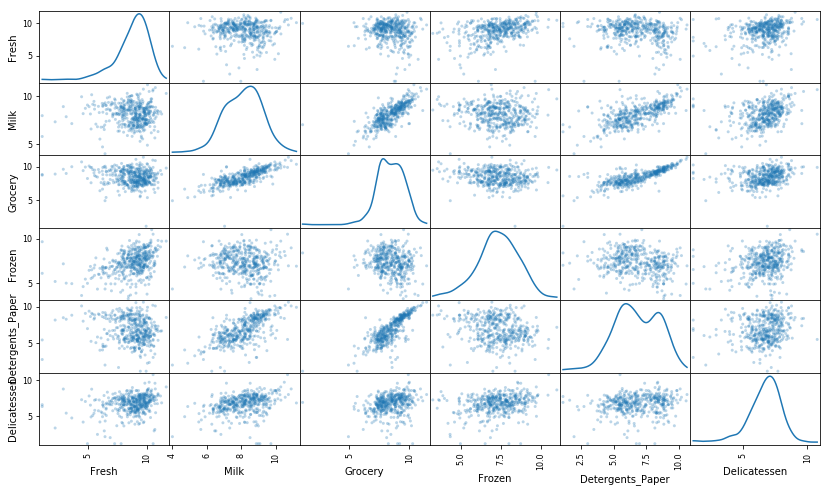

In [51]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [52]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  8.861775   9.191158   9.166179  7.474205          8.099554      7.482119
1  9.687630  10.740670  11.437986  6.933423         10.617099      7.987524
2  9.654193   6.921658   8.286521  6.813445          4.934474      7.228388

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [53]:
# For each feature find the data points with extreme high or low values
feature_outliers = {}

def compare_count(index):
    return feature_outliers[index]['count']

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    #Display the outliers
    #print(str(feature) +":")
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    for outlier in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:     
        feature_outlier = feature_outliers.get((outlier), {'count':0, 'features': []})
        feature_outlier['count'] += 1
        feature_outlier['features'].append(feature)
        feature_outliers[outlier] = feature_outlier

outliers = list(feature_outliers.keys())
outliers.sort(key=compare_count)
for outlier in outliers:
    if feature_outliers[outlier]['count'] != 1:
        print("outlier {} in {} features: {}".format(outlier, feature_outliers[outlier]['count'], feature_outliers[outlier]['features']))

#outliers = np.array(outliers, np.int32)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

outlier 128 in 2 features: ['Fresh', 'Delicatessen']
outlier 65 in 2 features: ['Fresh', 'Frozen']
outlier 66 in 2 features: ['Fresh', 'Delicatessen']
outlier 75 in 2 features: ['Grocery', 'Detergents_Paper']
outlier 154 in 3 features: ['Milk', 'Grocery', 'Delicatessen']


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Indices 154, 75, 65 and more were identified as outliers for more than one feature. These data points should be removed from the data point as they are clearly not reliable results (they fall outside the expected range) and will skew the analysis. All the other points should be removed from the data set too because they fal out of the expected the region. The expected region is a calculated with a genourous cut-off due to the 1.5 coefficient, which means any data point lying outisde the expected region is an outlier. 

# Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

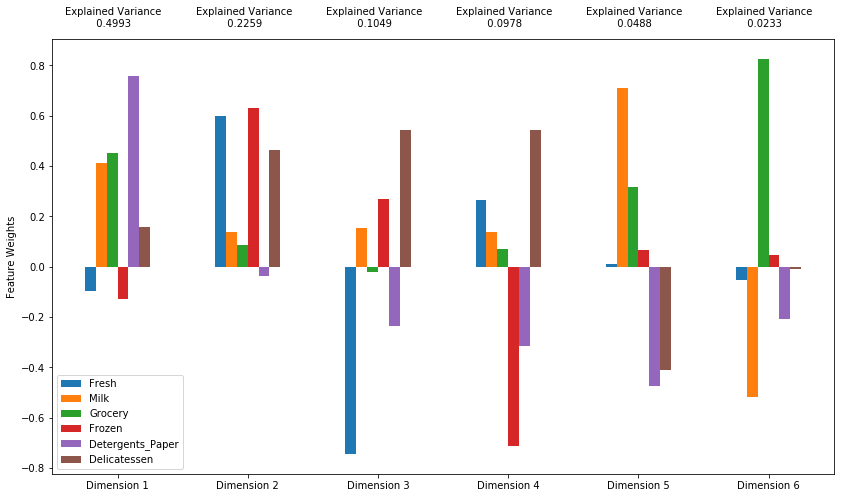

In [54]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** The first and second principal components give a total explained variance of 0.7252, and the first four principal components have a total variance of 0.9279. This means that the first four features are responsible for the 78% of the variance. The first four dimensions, therefore, are very descriptive of the patterin in spending by the different customer segments. Dimension 1 (the first principle component) shows that the customer segment spends majorly on detergents_paper, grocery and milk. Most of the second principle component's spending is on fresh food, frozen food and delicatassen. The low values show that the customer segment spends an amount clsoe to the average on that particular product type, while the negative values show that the customer segment spends less than average on that good type. 

For dimension 1, detergent's paper has the most weight, while milk and grocery too have significant positive weights. Fresh and frozen food on the other hand, has negative weights. So in dimension 1, the pattern of spending is mostly on household products. Dimension 2 has equal weightage on fresh food and frozen food, and delicatassen also has a large postive weight. Detergents_paper has a small negative weight for dimension 2. So dimension two seems to represent a pattern of spending that could belong to an establishment like a deli. The third principal component has a very large negative weight for fresh food while it has positive weights for frozen food, milk and delicatassen. This may represent a pattern of buying food that can be stored easliy, so it might represent a customer like a student living in a hostel. Dimension four is different from dimension three when it comes to frozen food as it gives frozen food a large negative weightage, which shows a decrease in the relevance of frozen food for this customer segment. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [55]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.8820       0.4617       0.2764       0.1055       0.0958   
1       5.5240       1.1625      -0.6076       0.5663       0.4874   
2      -1.8839       0.1372      -0.2172       1.2747      -0.2243   

   Dimension 6  
0      -0.2093  
1       0.2678  
2       0.8252

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

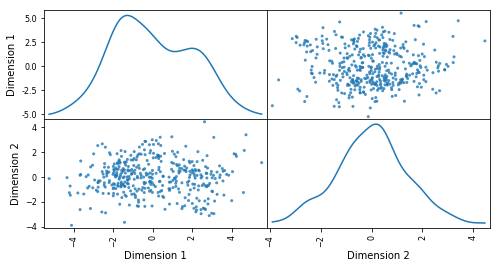

In [56]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

pd.plotting.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [57]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.8820       0.4617
1       5.5240       1.1625
2      -1.8839       0.1372

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

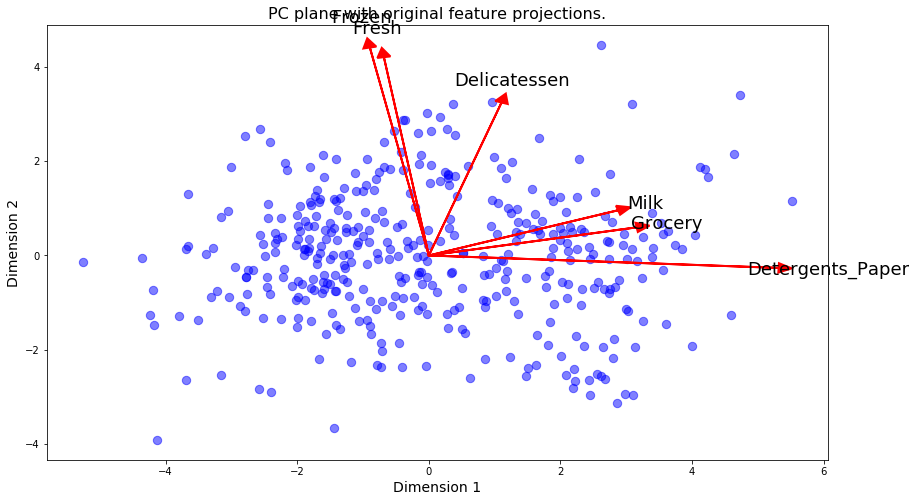

In [58]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** The advanatge of a K-means clustering algorithm is that it is easy and simple to program and is fast. However, the output from the algorithm will not always be the same for an unaltered training set because the algoirithm produces varying results depending on where the initial centres are set. 

The Guassian Mixture Model is that it is more felxible than the K-means clustering model as the point assigments are not so strict. It allows for a point to belong to more than one cluster. 

The whole sale customer data seems to not distinclty fall into specific customer segments. I would use GMM, although it would be slower to converge to k number of cluster than the K-means clustering algorithm, it would cluster the customers more comprehensibly.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [59]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

num_c = 2
clusterer = GaussianMixture(n_components = num_c, random_state = 42)

# TODO: Predict the cluster for each data point
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("Score for {} clusters was: {}".format(num_c,score))

Score for 2 clusters was: 0.447411995571


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
<p>Score for 2 clusters was: 0.447411995571</p>
<p>Score for 3 clusters was: 0.361193625039</p>
<p>Score for 4 clusters was: 0.318253457403</p>
<p>Score for 5 clusters was: 0.313056565177</p>
<p>Score for 6 clusters was: 0.340603716382</p>
<p>Score for 7 clusters was: 0.329660781949</p>
<p>Score for 8 clusters was: 0.329122067795</p>
<p>Score for 9 clusters was: 0.262684694978</p>
<p>Score for 10 clusters was: 0.299579567197</p>
<p>The best score was for 2 clusters. As the number of clusters increases, the score generally decreased (was lower than that of 2)</p>

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

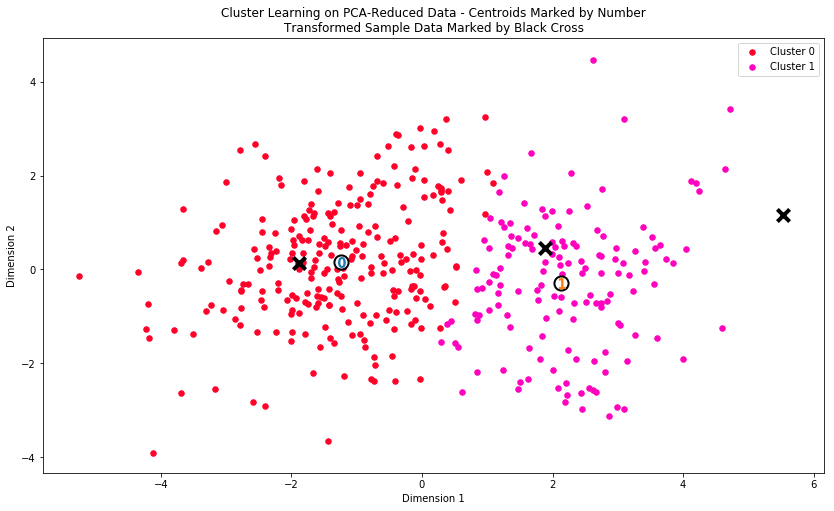

In [60]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [61]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

data_no_outliers = data.drop(data.index[outliers])

print("")

print("Difference between the true center and the mean:")
display(true_centers - np.around(data_no_outliers.mean().values))

print("")

print("Difference between the true center and the median:")
display(true_centers - np.around(data_no_outliers.median().values))

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9468.0  2067.0   2624.0  2196.0             343.0         799.0
Segment 1  5174.0  7776.0  11581.0  1068.0            4536.0        1101.0


Difference between the true center and the mean:


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0 -2963.0 -3419.0  -4881.0  -833.0           -2382.0        -656.0
Segment 1 -7257.0  2290.0   4076.0 -1961.0            1811.0        -354.0


Difference between the true center and the median:


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   360.0 -1545.0  -1949.0   466.0            -445.0        -199.0
Segment 1 -3934.0  4164.0   7008.0  -662.0            3748.0         103.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Segment 0 has a total spending of 17,515, while segment 1 has a total spending of 31,236. So it is obvious that segment 1 represents bigger establishments than segment 0.

Segment 0 is likey to be small cafe that serves fresh sandwiches etc (as suggestd by the high proportion of fresh foods purchased) while segment 1 represents an establishment like a grocery shop becuase it buys a high proportion of grocery, milk and detergent_paper. The statistics above shows this. Although both segments purchase fresh food at amounts less than the mean value, segment 0 buys a lot more of fresh food than segment 1. On the other hand, segment 1 buys much more of milk than segment 0 as can be seen by differences between the median/mean with the true centers. The pattern of spending shown above by the statistics of the segments show who segment 0 his a bigger purchaser of fresh goods and frozen products at quatities that suggest it is a shop serving foods, while segment 0 represents customers that retail fresh products as can be seen by the tendency to buy more than average amounts of milk and grocery. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [62]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** Sample 0 is best represented by segment 1 as sample 0 prefers to buy high proportions of milk and grocery, just like customers in segment 1. Sample 1 seem to belongs segment 0 too because of its dependance on fresh food and milk, and sample 2 seems to belong to segment 1. 

The clustering algorithm predicsts sample 1 and sample 2 to belong to same customer segment, as I predicted, and sample 1 in the other customer segment. So the clustering is consistent with my predictions. 

###### Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Looking at the spending of the segments, we can see that segments 0 buys high proportion of fresh goods, so it is clear that changing the delivery service will affect the customers behaviour postively as they will be more willing to use the delivery service as the fresh goods would be less likey to be spoiled in storage if delivered more quickly (due to more frequent delivery service). However, for customers in segment 1, delivery time is less dependant as they buy less of goods that are at risk of being spoiled due to lenghty intervals between delivery.

To test these hypothesises, the wholesale distributor will need to use statistical tools to measure the affect on the different customer segments by apply the A/B testing method. We would need to take sample of customers from each of the two clusters. The remaining customers will be the control group. We would test the proposed '3 days a week' service to each sample, and measure how each cluster reacted to the change by contrasting the sample's feedback on the service and that of the remainder of the cluster it belongs to.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** We could use a unsupervised clustering algorithm (like GMM) to predict the segment for the customers, to produce the labels for existing data points. Now that there is customer segment labels for the data points, we can train an supervised clustering algirthm on the original data with the labels to predict the customer segemtn for the ten new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

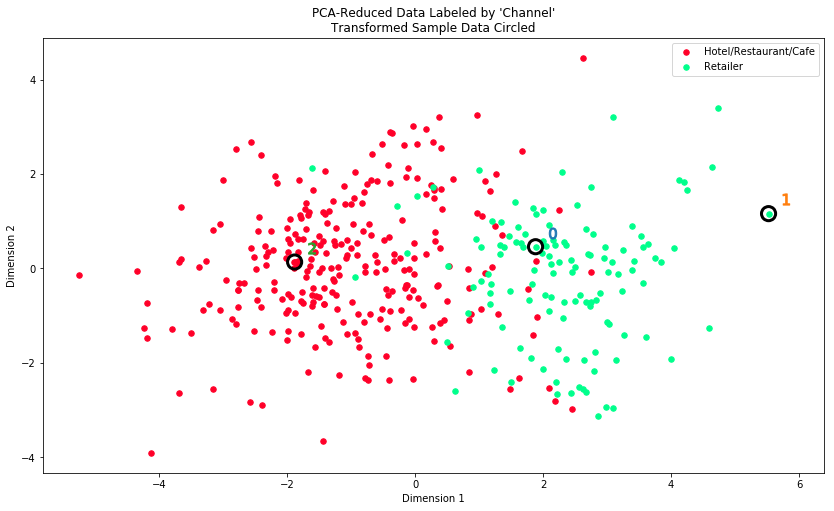

In [63]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm I built correclty clustered sample 0 and 1 in the same retailer cluster, and sample 2 in the restuarant cafe. Howewever, the distribution is more mixed than predicted by the clustering algorithm. The classfication are consistent with my previous definition of the customer segments - I predicted one segment to be establishment like a cafe while the other a grocer (a retailer). 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.